<a href="https://colab.research.google.com/github/ankitkarmakar95/learnings/blob/main/Fitbitmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
fitbit=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/FitbitTracker.xlsx')

In [5]:
fitbit.head()

,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,25,13,328,728,1985
1,21,19,217,776,1797
2,30,11,181,1218,1776
3,29,34,209,726,1745
4,36,10,221,773,1863


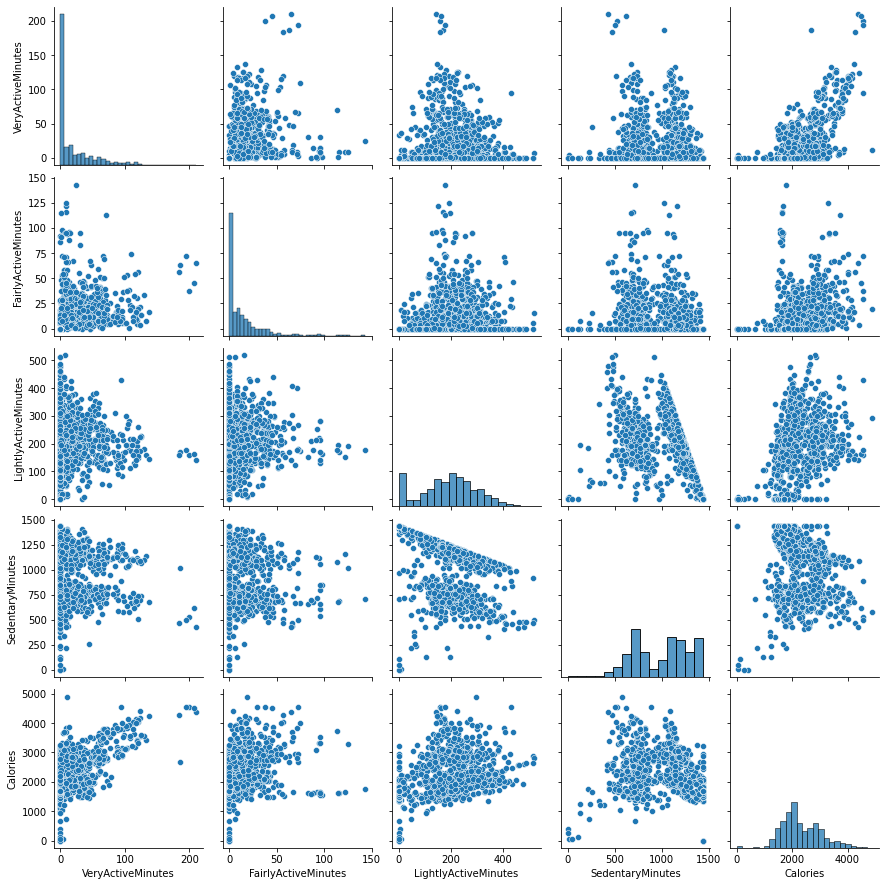

In [6]:
# Visualizing data
import seaborn as sns
sns.pairplot(fitbit)


## ***Data cleansing  #START#***

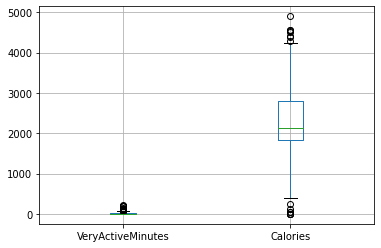

In [19]:
fitbit[['VeryActiveMinutes','Calories']].boxplot()

In [22]:
fitbit[fitbit['Calories']>4500]

,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
572,200,37,159,525,4552
585,207,45,163,621,4501
586,194,72,178,499,4546
606,11,19,294,579,4900
913,94,29,429,888,4547


In [28]:
fitbit.drop(fitbit.index[[572,585,586,606,913]], inplace=True)

In [29]:
fitbit[fitbit['Calories']>4500]

,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories


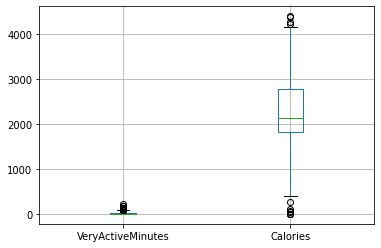

In [30]:
fitbit[['VeryActiveMinutes','Calories']].boxplot()

In [32]:
fitbit.describe()

,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,935.000000,935.000000,935.000000,935.000000,935.000000
mean,20.522995,13.421390,192.535829,993.182888,2291.280214
std,31.227446,19.900394,109.131782,300.685683,699.857575
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,127.000000,731.000000,1827.000000
50%,4.000000,6.000000,199.000000,1061.000000,2131.000000
75%,31.000000,19.000000,263.500000,1232.000000,2783.500000
max,210.000000,143.000000,518.000000,1440.000000,4398.000000


In [33]:
fitbit.isnull().sum()

VeryActiveMinutes       0
FairlyActiveMinutes     0
LightlyActiveMinutes    0
SedentaryMinutes        0
Calories                0
dtype: int64

In [35]:
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 935 entries, 0 to 939
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   VeryActiveMinutes     935 non-null    int64
 1   FairlyActiveMinutes   935 non-null    int64
 2   LightlyActiveMinutes  935 non-null    int64
 3   SedentaryMinutes      935 non-null    int64
 4   Calories              935 non-null    int64
dtypes: int64(5)
memory usage: 43.8 KB


In [51]:
ind=fitbit[fitbit['Calories']<100].index

In [52]:
fitbit.drop(index=ind, inplace=True)

In [53]:
fitbit[fitbit['Calories']<100].index

Int64Index([], dtype='int64')

In [56]:
ind=fitbit[fitbit['VeryActiveMinutes']<1].index
fitbit.drop(index=ind, inplace=True)
fitbit[fitbit['Calories']<1].index

Int64Index([], dtype='int64')

In [58]:
ind=fitbit[fitbit['LightlyActiveMinutes']<1].index
fitbit.drop(index=ind, inplace=True)
fitbit[fitbit['Calories']<1].index

Int64Index([], dtype='int64')

In [60]:
ind=fitbit[fitbit['FairlyActiveMinutes']<1].index
fitbit.drop(index=ind, inplace=True)
fitbit[fitbit['Calories']<1].index

Int64Index([], dtype='int64')

In [62]:
ind=fitbit[fitbit['SedentaryMinutes']<1].index
fitbit.drop(index=ind, inplace=True)
fitbit[fitbit['Calories']<1].index

Int64Index([], dtype='int64')

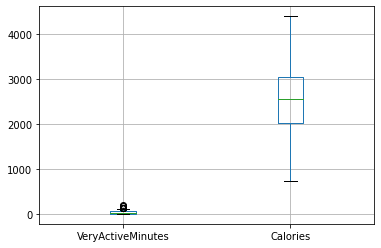

In [64]:
fitbit[['VeryActiveMinutes','Calories']].boxplot()

In [65]:
fitbit.describe()

,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,520.000000,520.000000,520.000000,520.000000,520.000000
mean,36.546154,23.198077,215.450000,934.755769,2583.613462
std,34.072712,21.436045,80.118009,248.196733,680.640157
min,1.000000,1.000000,9.000000,222.000000,741.000000
25%,10.000000,9.000000,158.000000,720.000000,2019.250000
50%,27.000000,16.000000,214.000000,966.000000,2552.000000
75%,55.000000,31.000000,270.000000,1144.250000,3045.000000
max,210.000000,143.000000,518.000000,1410.000000,4398.000000


## **Data Cleansing  #END#**

Text(0.5, 0, 'Calories')

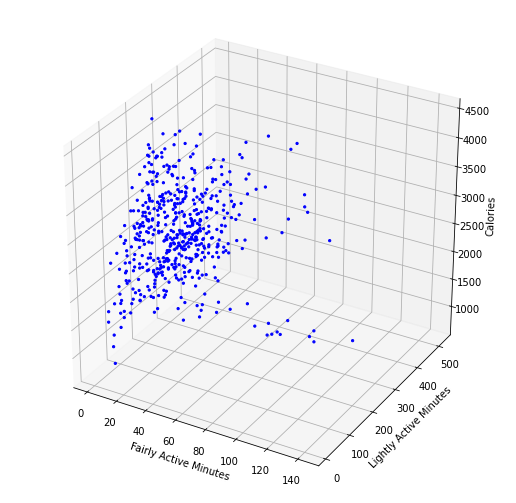

In [66]:
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(xs = fitbit["FairlyActiveMinutes"], ys = fitbit["LightlyActiveMinutes"], zs=fitbit["Calories"],
           c='blue',
           alpha=1,
           marker='.')
ax.set_xlabel("Fairly Active Minutes")
ax.set_ylabel("Lightly Active Minutes")
ax.set_zlabel("Calories")

In [67]:
model = LinearRegression()
train, test = train_test_split(fitbit,test_size=0.30,train_size=0.70)
X = train[["FairlyActiveMinutes","LightlyActiveMinutes"]]
Y = train["Calories"]
model.fit(X,Y)
print("Intercept:",model.intercept_ ,"\nCoefficients:",model.coef_)

Intercept: 2412.844632834271 
Coefficients: [0.41387093 0.90257632]


### **The obtained best fit model will only be valid if the predictor variables are linearly independent. If the coeffs are close to -1 or 1 then they can be called dependent.Hence, to determine the strength of linear relationship between the variables, correlation can be used.**

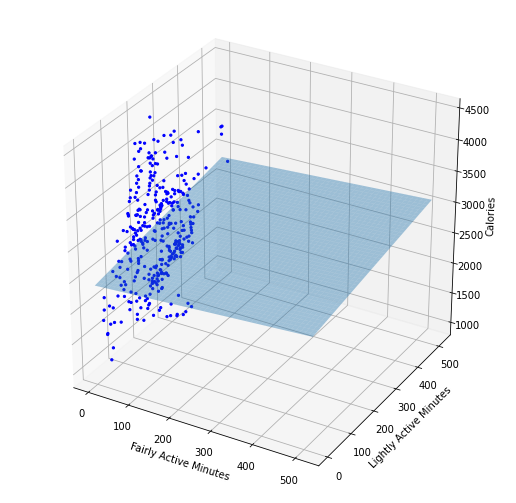

In [68]:
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(xs = train["FairlyActiveMinutes"], ys = train["LightlyActiveMinutes"], zs=train["Calories"],
           c='blue',
           alpha=1,
           marker='.')
ax.set_xlabel("Fairly Active Minutes")
ax.set_ylabel("Lightly Active Minutes")
ax.set_zlabel("Calories")
x_surf = np.arange(train["FairlyActiveMinutes"].min(), train["LightlyActiveMinutes"].max(), 1) 
y_surf = np.arange(train["FairlyActiveMinutes"].min(), train["LightlyActiveMinutes"].max(), 1)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)
X_mesh = pd.core.frame.DataFrame({'FairlyActiveMinutes': x_surf.ravel(), 'LightlyActiveMinutes': y_surf.ravel()})
out = model.predict(X_mesh)
ax.plot_surface(x_surf, y_surf,
                out.reshape(x_surf.shape),
                alpha = 0.4)

In [69]:
#finding the correlations
np.corrcoef([fitbit["FairlyActiveMinutes"],fitbit["LightlyActiveMinutes"],fitbit["Calories"]])

array([[1.        , 0.01094383, 0.04438578],
       [0.01094383, 1.        , 0.08681051],
       [0.04438578, 0.08681051, 1.        ]])

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [71]:
X=fitbit
vif = pd.Series([variance_inflation_factor(X.values,idx) 
           for idx in range(X.shape[1])],
          index=X.columns)
print(vif)

VeryActiveMinutes        3.506556
FairlyActiveMinutes      2.116711
LightlyActiveMinutes     7.437850
SedentaryMinutes         8.442017
Calories                19.913173
dtype: float64


So the predictors are correlated. Target is highly correlated